In [10]:
import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}

image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"):
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

643
643
(643, 192, 192, 3) (643,)
[[[[0.42352942 0.42352942 0.42352942]
   [0.43137255 0.43137255 0.43137255]
   [0.43529412 0.43529412 0.43529412]
   ...
   [0.32156864 0.32156864 0.32156864]
   [0.34117648 0.34117648 0.34117648]
   [0.37254903 0.37254903 0.37254903]]

  [[0.44705883 0.44705883 0.44705883]
   [0.44313726 0.44313726 0.44313726]
   [0.40392157 0.40392157 0.40392157]
   ...
   [0.29803923 0.29803923 0.29803923]
   [0.32941177 0.32941177 0.32941177]
   [0.34509805 0.34509805 0.34509805]]

  [[0.44313726 0.44313726 0.44313726]
   [0.41568628 0.41568628 0.41568628]
   [0.41960785 0.41960785 0.41960785]
   ...
   [0.2627451  0.2627451  0.2627451 ]
   [0.30980393 0.30980393 0.30980393]
   [0.31764707 0.31764707 0.31764707]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.     

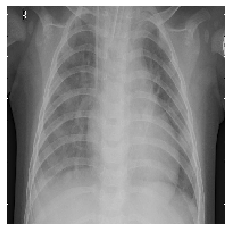

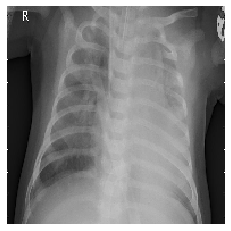

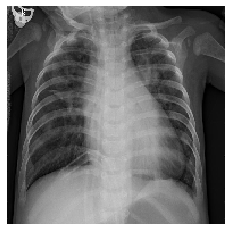

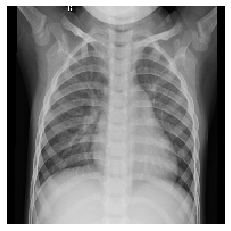

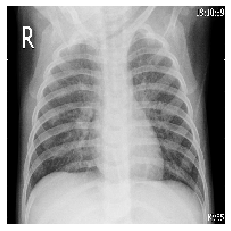

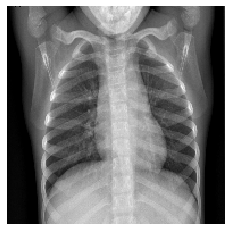

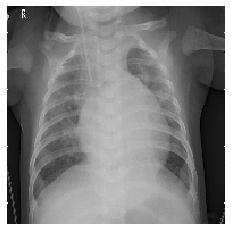

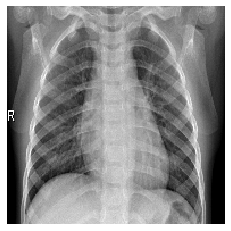

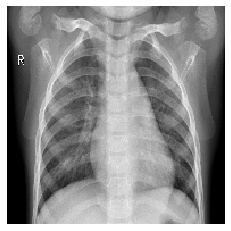

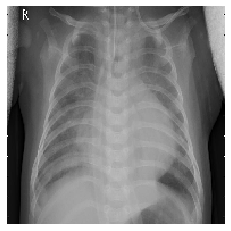

In [11]:
"""
Next steps:
Do validation and test set - Set up the test data and validation data. 
Repeat the same thing for virus vs bacteria. 


This is the test step
"""

import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("test/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}
#labels the folders in the directory
image_data3 = []
labels3 = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"): #For each image in the list of images: 
        img = image.load_img(img_path, target_size=(192,192))
        img_array = image.img_to_array(img) #Converts image into numerical values
        image_data3.append(img_array) #Append the numerical representation of the image to an array
        labels3.append(labels_dict[label])#The label list appends the label of that particular instance


print(len(labels3))
print(len(image_data3))


#convert data to numpy array 
image_data3 = np.array(image_data3, dtype='float32')/255.0 #Why do we need this? 
labels3 = np.array(labels3)
#192*192 is the size

print(image_data3.shape, labels3.shape) #This means it is a four dimensional?
print(image_data3) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 

## Randomly shuffle data

import random 
combined = list(zip(image_data3, labels3))
random.shuffle(combined)

image_data3[:], labels3[:] = zip(*combined)

## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data3[i])


In [13]:
from keras.utils import to_categorical

#one-hot encode target column

labels= to_categorical(labels,2)
labels3= to_categorical(labels3,2)
print(len(labels)) #This is where the bug came from - labels is just a list of arrays. 
print(len(labels3))

5254
643


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(192,192,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
print("run here")
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

run here


In [16]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(labels[0].shape)

(2, 2)


In [18]:
#train the model
print(image_data3.shape)

model.fit(image_data, labels, validation_data=(image_data3, labels3), epochs=3)

(643, 192, 192, 3)


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 5254 arrays: [array([[[206., 206., 206.],
        [208., 208., 208.],
        [205., 205., 205.],
        ...,
        [197., 197., 197.],
        [200., 200., 200.],
        [213., 213., 213.]],

       [[204., 2...